<font size = +3 color = "#1E1E1E"><center><b> Housing Prices Competition: Clear and Concise Exploratory Data Analysis 🏘️💰📊 </b></center></font>

<br>

<img src="https://images.unsplash.com/photo-1464082354059-27db6ce50048?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1350&q=80" width = 600>
<center>Photo by Toa Heftiba (Unsplash)</center>

<br>

**Table of Contents**

- [Introduction](#Introduction)
- [Libraries and Default Parameters](#Libraries-and-Default-Parameters)
- [Getting the Data](#Getting-the-Data)
- [A Quick Look at our Data](#A-Quick-Look-at-our-Data)
    - [Missing Values](#Missing-Values) <br>
    - [Data Types](#Data-Types)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Numeric Data](#Numeric-Data) <br>
    - [The Response Variable: 'SalePrice'](The-Response-Variable:-'SalePrice') <br>
    - [Categorical Data](#Numeric-Data) <br>
- [Bivariate Analysis](#Bivariate-Analysis)
- [Conclusions](#Conclusions)

<br>

# Introduction



<br>

# Libraries and Default Parameters

We start by importing the necessary libraries and setting some parameters for the whole notebook. We will mainly use three Python libraries:

- Pandas for handling and analysing data, and
- Seaborn and Matplotlib for data visualisation.


In [1]:
import numpy as np
import pandas as pd
pd.set_option('precision', 2)

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'  # Enable retina display

import seaborn as sns

In [2]:
plt.style.use('fivethirtyeight')
main_color  = '#B7C3F3'
edgecolor = 'black'

font_size = 14

plt.rcParams['axes.edgecolor'] = '0.15'
plt.rcParams['axes.linewidth']  = 1
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['axes.titlesize'] = font_size
plt.rcParams['xtick.labelsize'] = font_size - 2
plt.rcParams['ytick.labelsize'] = font_size - 2

plt.rcParams['lines.linewidth'] = 3

<br>

# Getting the Data

The whole dataset has already been split into a training set ('train.csv') and a test set ('test.csv'). We can use the `read_csv()` method to load them as Pandas DataFrames:

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print('✔️ DataFrames loaded successfully!\n')
print('The train set contains {} rows and {} columns'.format(train_df.shape[0], train_df.shape[1]))
print(' The test set contains {} rows and {} columns'.format(test_df.shape[0], test_df.shape[1]))

✔️ DataFrames loaded successfully!

The train set contains 1460 rows and 81 columns
 The test set contains 1459 rows and 80 columns


In [4]:
all_cols = train_df.columns & test_df.columns
uncommon_col = np.setdiff1d(train_df.columns, all_cols)[0]

print("Column not in common: '{}'".format(uncommon_col))

Column not in common: 'SalePrice'


The difference in the number of columns/attributes is because the **training set** is **labelled**, i.e. it contains a column for the price of each house ('SalePrice'). This column is often termed as the **target** or **response variable**.

Therefore, the training set should be used to build our machine learning models, while the test set should be used to see how well our model performs on unseen/unlabelled data.

<br>

# A Quick Look at our Data

This section aims to familiarise ourselves with the data. We will focus entirely on the **training set** and forget about the test set completely (which ensures we will not add *data snooping* bias). 

Firstly, we can take a glance at the top five rows of the training set using the `head()` method:

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


It would be tedious to go through the meaning of each column individually. For more information, please read the [data_description.txt](https://www.kaggle.com/c/home-data-for-ml-course/data?select=data_description.txt).

We can drop 'Id' since it is unique to each instance/observation and does not provide any useful information:

In [6]:
train_df.drop(['Id'], axis=1, inplace=True)
print("✔️ Column 'Id' dropped!")

✔️ Column 'Id' dropped!


<br>

## Missing Values

Notice that some columns contain **missing values** ('NaN,' stands for 'Not a Number'). We can see both the count and the percentage of missing values for each column:

In [7]:
missing_counts = train_df.isnull().sum().sort_values(ascending=False)
missing_percent = (train_df.isnull().sum() * 100 / train_df.shape[0]).sort_values(ascending=False)

missing_df = pd.concat([missing_counts, missing_percent],
                       axis=1,
                       keys=['Counts', 'Percentage (%)'])

display(missing_df.head(20).style.background_gradient(cmap='Reds', axis=0))

,Counts,Percentage (%)
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageCond,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


Nineteen attributes contain missing values. Our first instinct would be to discard the first five attributes ('PoolQC' to 'FireplaceQu') since more than 40% is missing. However, the description informs us that a NaN value in these columns indicates the absence of what is described. As an example, NaN in 'PoolQC' simply means that there is no pool.

Therefore, we should **not remove** these values when building our models but instead construct a strategy for **imputation**.

<br>

## Data Types

There are two types of variables:

1) **Numeric** variables that can be expressed on a numeric scale. There are two basic categories of numeric variables:

- **Continuous**: can take any value within a range/interval (e.g. a person's height), and
- **Discrete**: can only take specific integer values (e.g. the number of students in a class).

2) **Categorical** variables that can take only a fixed set of values that correspond to a set of possible categories (e.g. gender, country names, etc.). Special cases of categorical variables are:

- **Binary**: only two categories exist (e.g. male/female, 1/0, etc.), and
- **Ordinal**: the categories have an order associated with them (e.g. low/medium/high). The opposite of ordinal categories are nominal categories.

Different visualisation techniques apply to each type, so it is useful to isolate numeric and categorical attributes as separate DataFrames:

In [8]:
numeric_atts = train_df.select_dtypes(exclude=['object'])
cat_atts = train_df.select_dtypes(include=['object'])

print('    Number of Numeric columns: ', len(numeric_atts.columns))
print('Number of Categorical columns: ', len(cat_atts.columns))

    Number of Numeric columns:  37
Number of Categorical columns:  43


<br>

# Exploratory Data Analysis 📊

## Numeric Data

By calling the `hist()` method, we can plot a histogram for each numeric attribute:

C:\Users\ko40\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


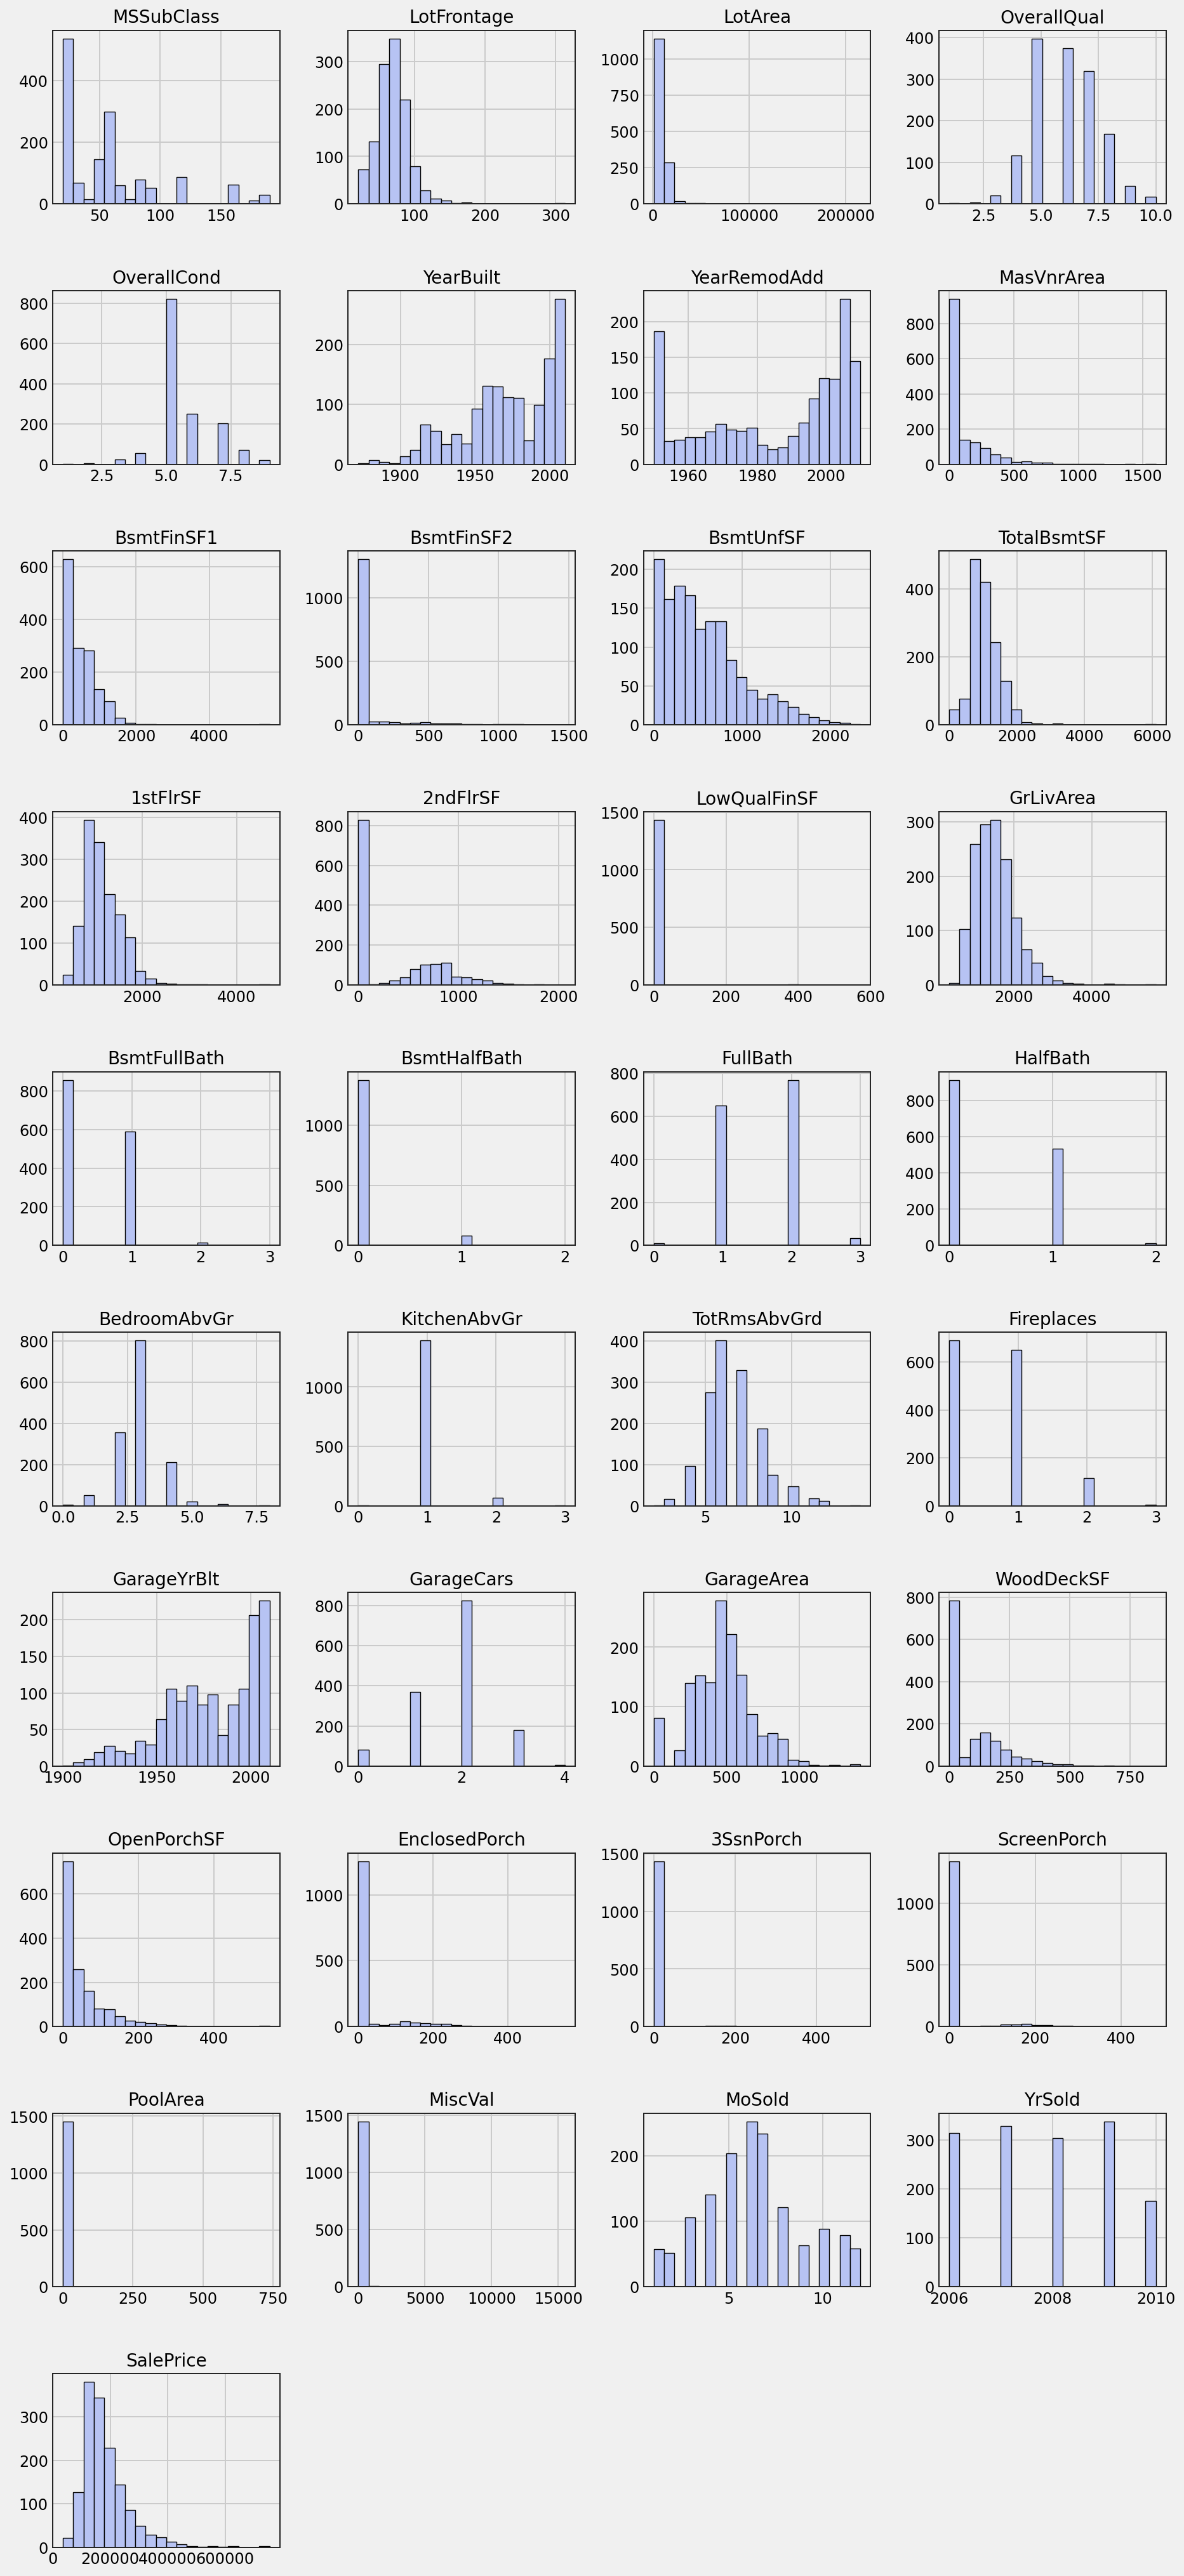

In [9]:
fig, ax = plt.subplots(figsize=(14, 34), facecolor='#f0f0f0')

numeric_atts.hist(layout=(10, 4),
                  bins=20,
                  color=main_color,
                  edgecolor=edgecolor,
                  linewidth=0.7,
                  ax=ax)

plt.subplots_adjust(hspace = 0.5);

We will not go into details about each feature, but in general, we can observe that:

- Some features, such as 'LowQualFinSF' and 'PoolArea', display **low variance**, which means that they are close to being constant. Therefore, they do not provide any information to a Machine Learning model for learning the patterns in the data, and they should be removed,
- Different attributes have **different scales**, and we need to take care of that at the processing stage, 
- Most attributes are **continuous** (e.g. 'LotFrontage'), but there are some **discrete** ones ('FullBath', 'YrSold', etc.), and 
- The target variable ('SalePrice') **deviates** from the symmetrical bell curve of the **normal distribution**. We will explore this in greater detail later.

<br>

We can write a function to isolate features with **low variance**:

In [10]:
def low_variance(df, thd=0.95):

    columns = []
    for column in df.columns:

        values = df[column].value_counts(normalize=True)
        if (values > thd).sum() > 0:
            columns.append(column)

    return columns


thd = 0.95
columns_low_var = low_variance(numeric_atts, thd)

print('Numeric attributes with mostly the same value (> {}%): '.format(thd))
print(*columns_low_var, sep=',\n')

Numeric attributes with mostly the same value (> 0.95%): 
LowQualFinSF,
KitchenAbvGr,
3SsnPorch,
PoolArea,
MiscVal


Let's now plot a **boxplot** for every continuous attribute:

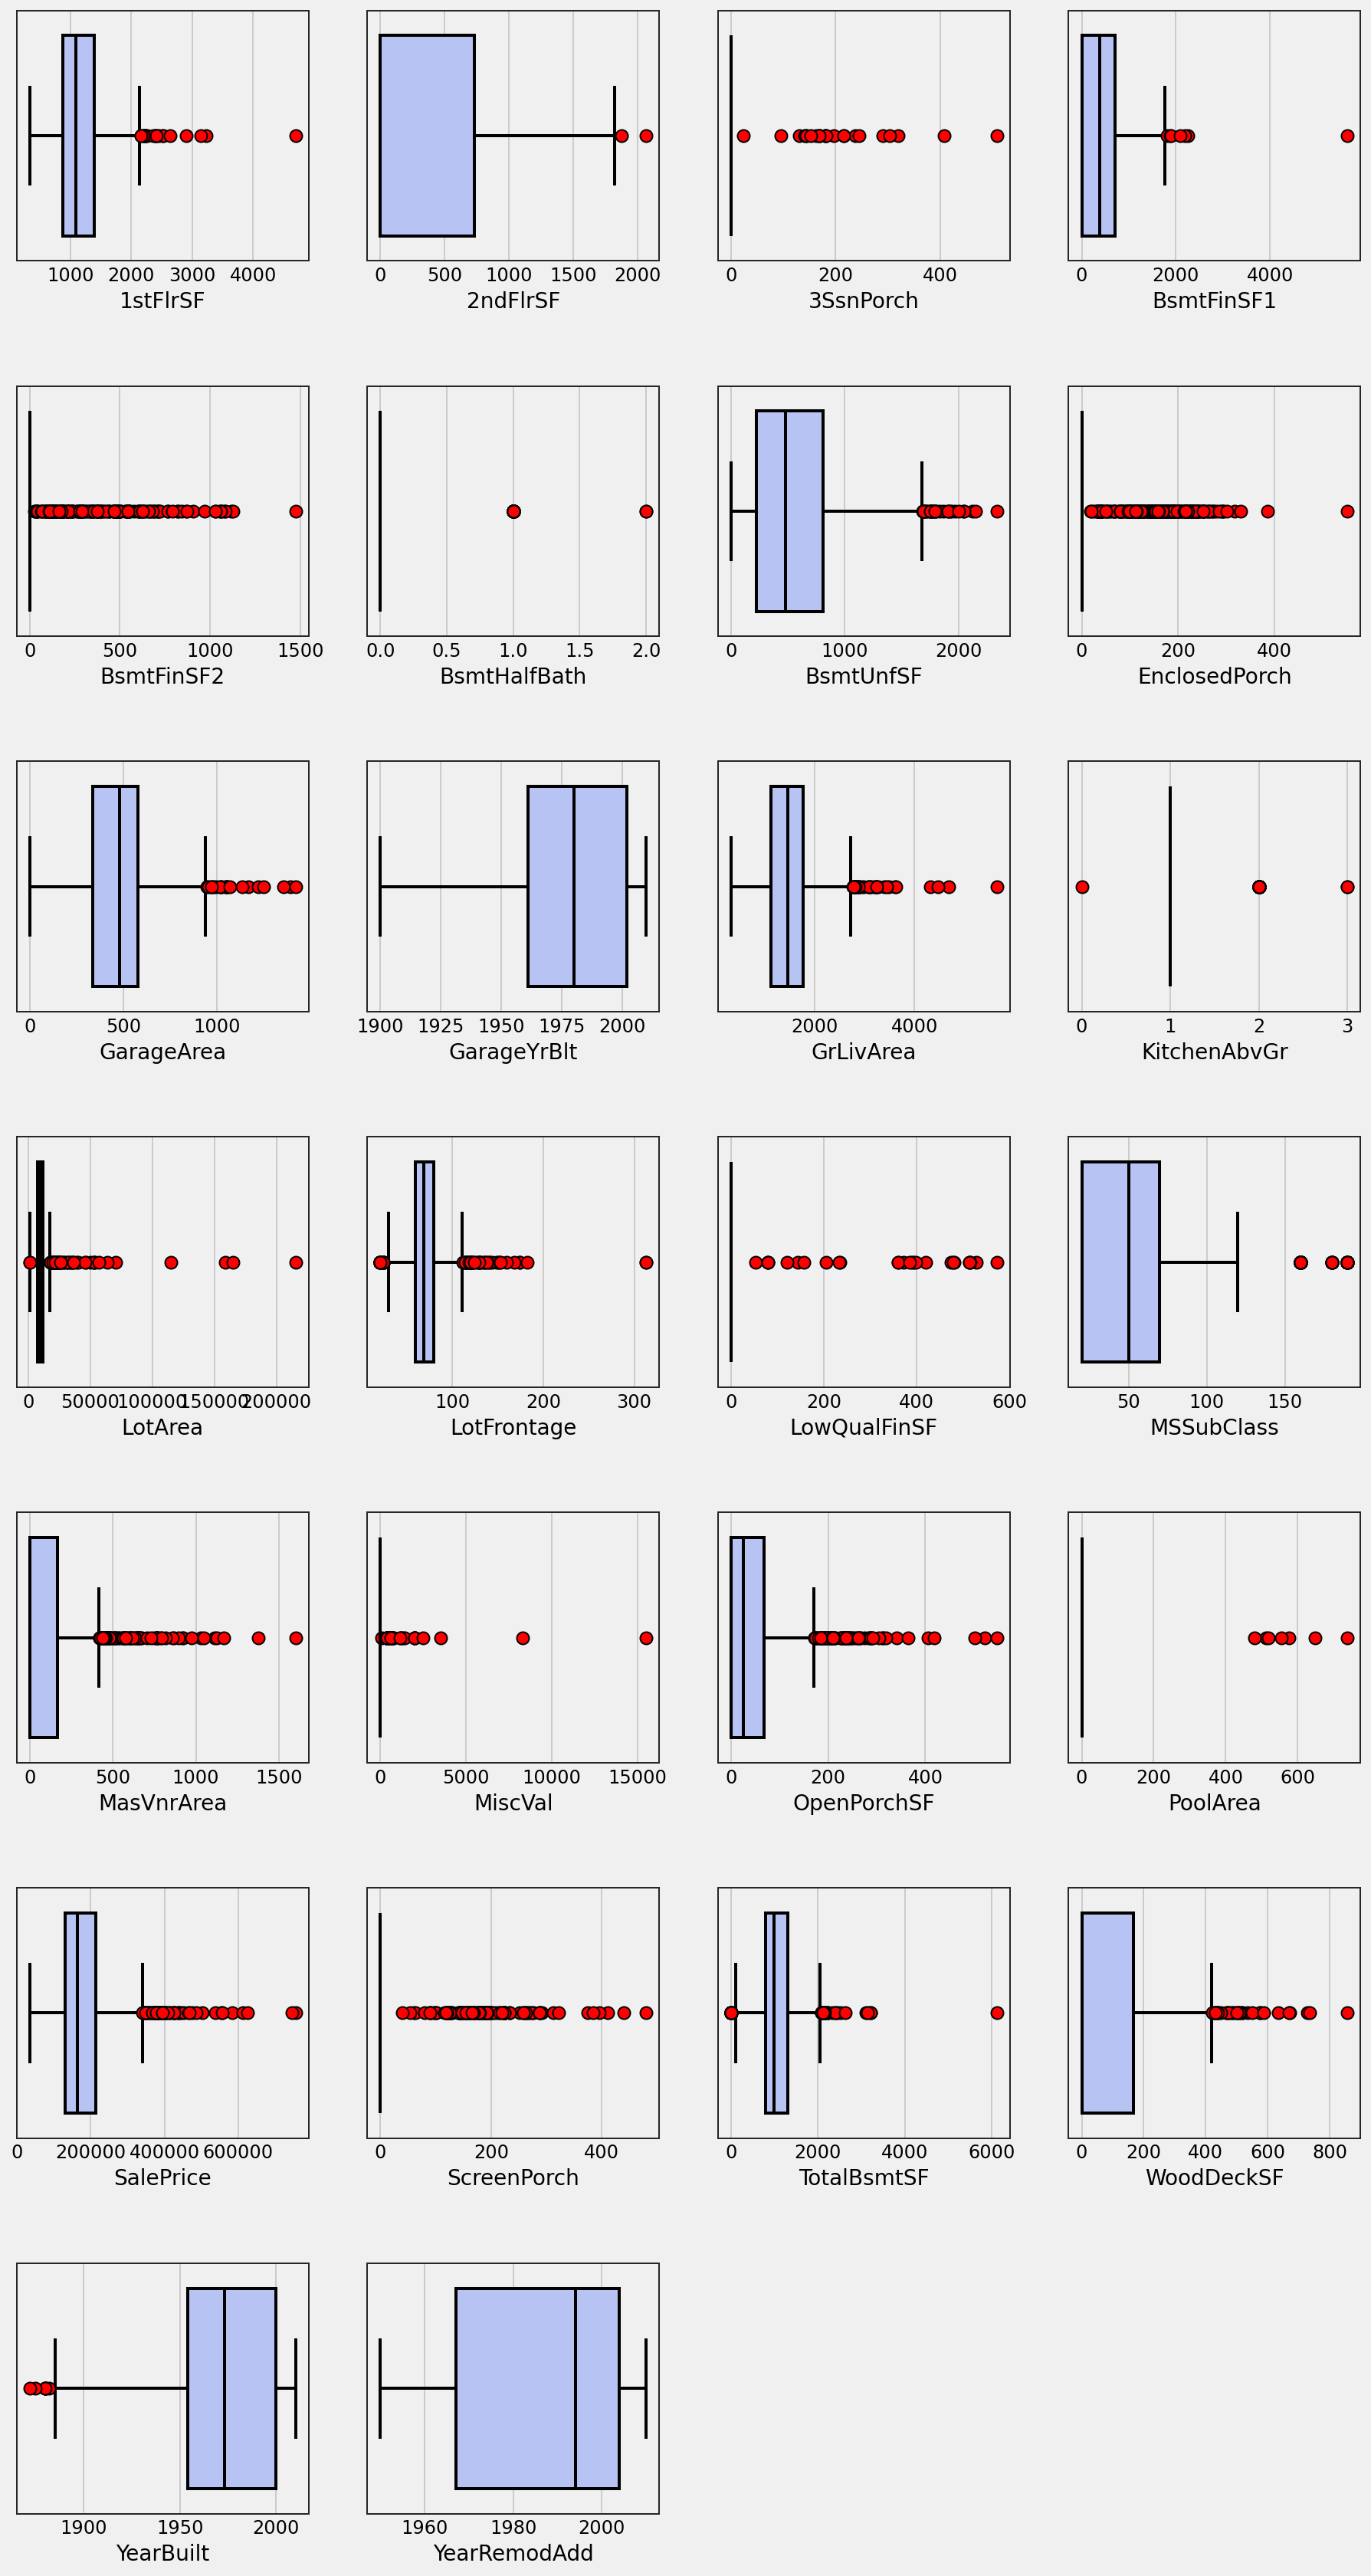

In [11]:
discrete_n_atts = [
    'OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold',
    'YrSold'
]
continuous_n_atts = np.setdiff1d(numeric_atts.columns, discrete_n_atts)

flierprops = dict(marker='o',
                  markerfacecolor='r',
                  markeredgecolor='k',
                  markersize=8)

fig = plt.figure(figsize=(14, 28), facecolor='#f0f0f0')

for index, column in enumerate(continuous_n_atts):

    plt.subplot(7, 4, index + 1)
    sns.boxplot(x=column,
                data=train_df,
                color='mediumseagreen',
                linewidth=2,
                medianprops={'color': edgecolor},
                capprops={'color': edgecolor},
                whiskerprops={'color': edgecolor},
                boxprops=dict(color=main_color, edgecolor=edgecolor),
                flierprops=flierprops)

plt.subplots_adjust(hspace=0.5);

- Most of the attributes suffer from **outliers**, and
- For some attributes, the min, max and the interquartile range 'collapse' into a line. That is because these attributes consist of mainly one value (for example, see '3SsnPorch' and 'PoolArea').

<br>

## The Response Variable: 'SalePrice'

Let's have a look at the response variable in greater detail:

Skewness: 1.88
Kurtosis: 6.54


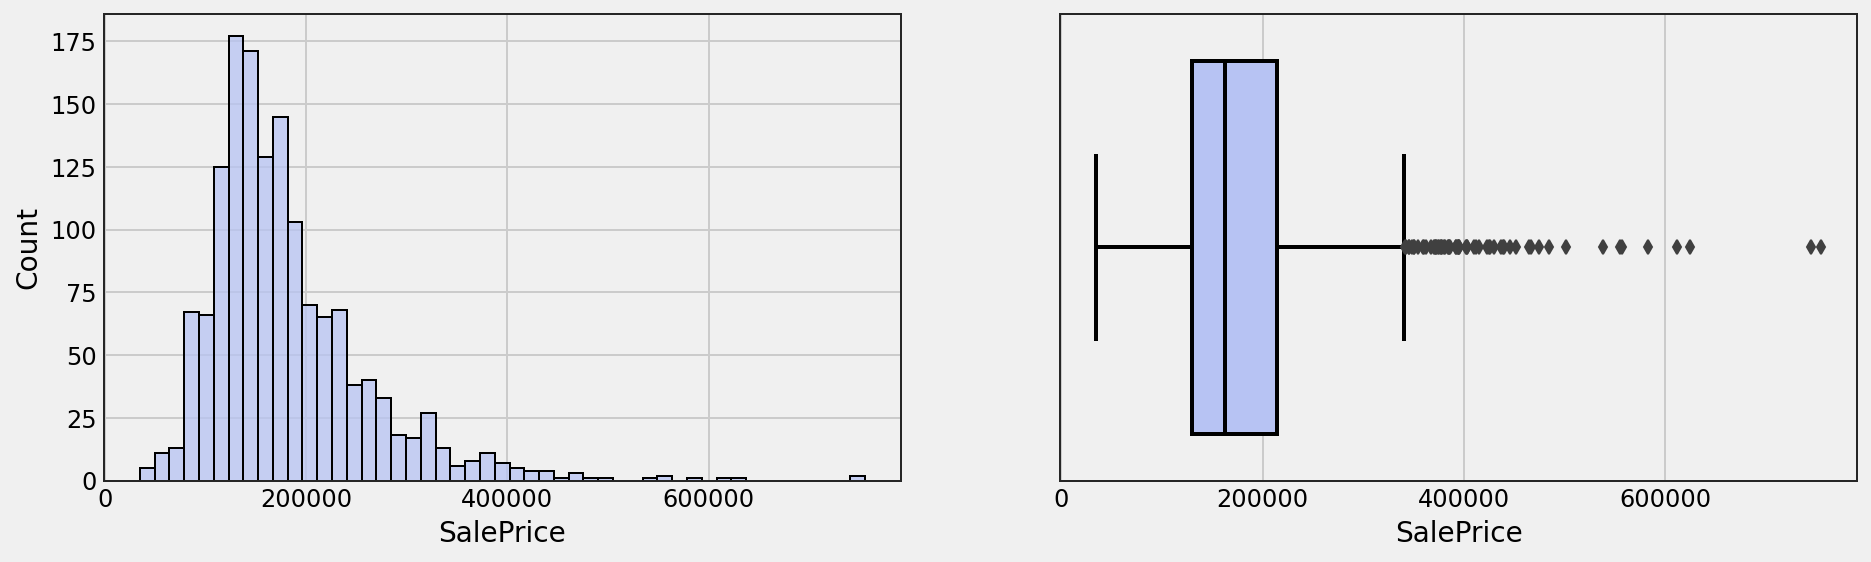

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4), facecolor='#f0f0f0')

sns.histplot(train_df['SalePrice'],
             color=main_color,
             edgecolor=edgecolor,
             linewidth=1,
             ax=ax1)
sns.boxplot(x=train_df['SalePrice'],
            linewidth=2,
            medianprops={'color': edgecolor},
            capprops={'color': edgecolor},
            whiskerprops={'color': edgecolor},
            boxprops=dict(color=main_color, edgecolor=edgecolor),
            ax=ax2)

for ax in [ax1, ax2]:
    ax.set_xticks([0, 200000, 400000, 600000])

# Skewness and kurtosis
print('Skewness: {}'.format(np.round(train_df['SalePrice'].skew(), 2)))
print('Kurtosis: {}'.format(np.round(train_df['SalePrice'].kurt(), 2)));

Our target variable deviates from the symmetrical bell curve we would expect from a normal distribution. Specifically, it is right-skewed (similar terms: right-tailed or skewed to the right) since the right tail is longer.

This realisation could be a problem since many ML algorithms do not do well with data that are not normally distributed. We can correct for this by performing a **log-transformation** of the target variable:

Skewness: 0.12
Kurtosis: 0.81


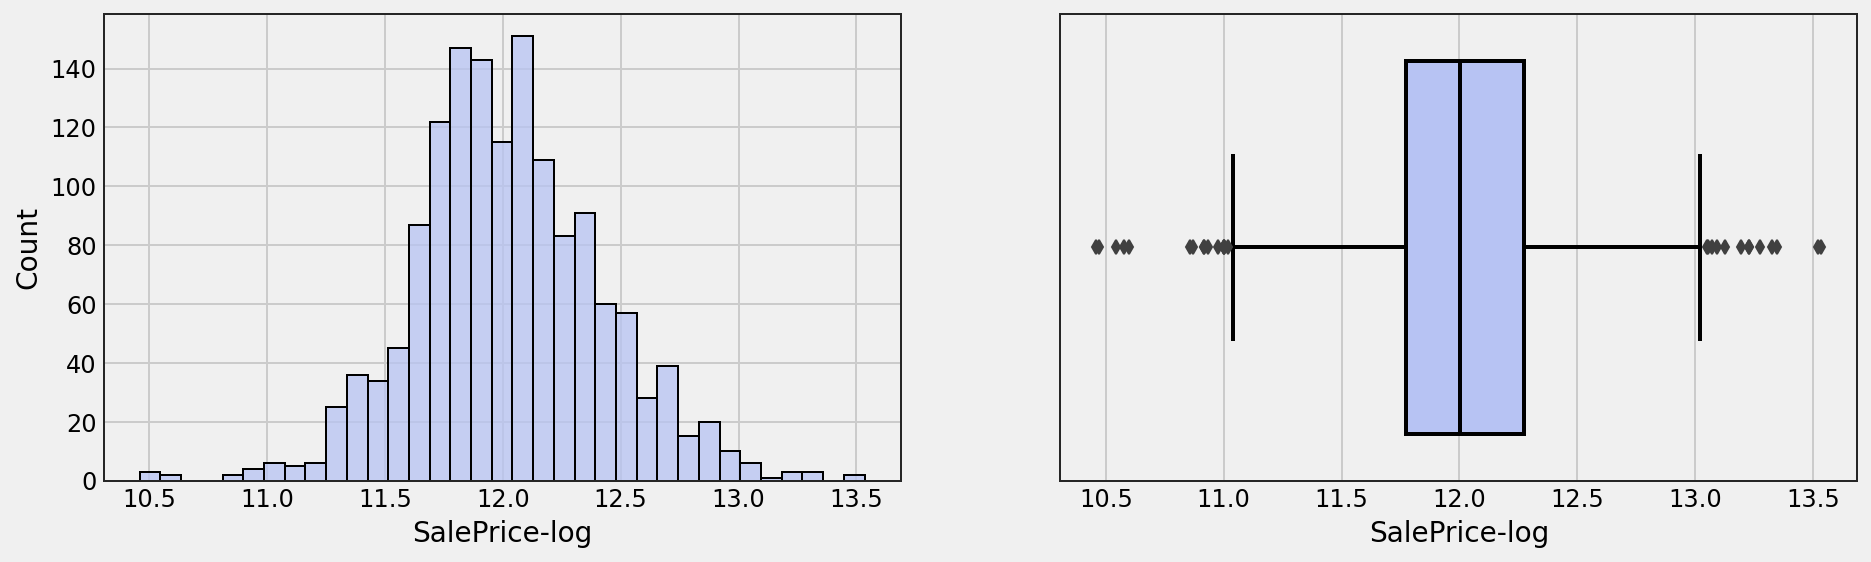

In [13]:
train_df['SalePrice-log'] = np.log1p(train_df['SalePrice'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4), facecolor='#f0f0f0')

sns.histplot(train_df['SalePrice-log'], color=main_color, edgecolor=edgecolor, linewidth=1, ax=ax1)
sns.boxplot(x=train_df['SalePrice-log'], linewidth=2,
            medianprops={'color': edgecolor},
            capprops={'color': edgecolor},
            whiskerprops={'color': edgecolor},
            boxprops=dict(color=main_color, edgecolor=edgecolor), ax=ax2)

# Skewness and kurtosis
print('Skewness: {}'.format(np.round(train_df['SalePrice-log'].skew(), 2)))
print('Kurtosis: {}'.format(np.round(train_df['SalePrice-log'].kurt(), 2)))

We can visually observe that our target variable appears more normally distributed now. Both the skewness (measure of the asymmetry) and kurtosis (measure of the tailedness) of the distribution decreased after the transformation.

Note that we should also take care of skewness present in the predictor variables. This will be done in the preprocessing stage (not shown in this notebook).

<br>

## Categorical Data

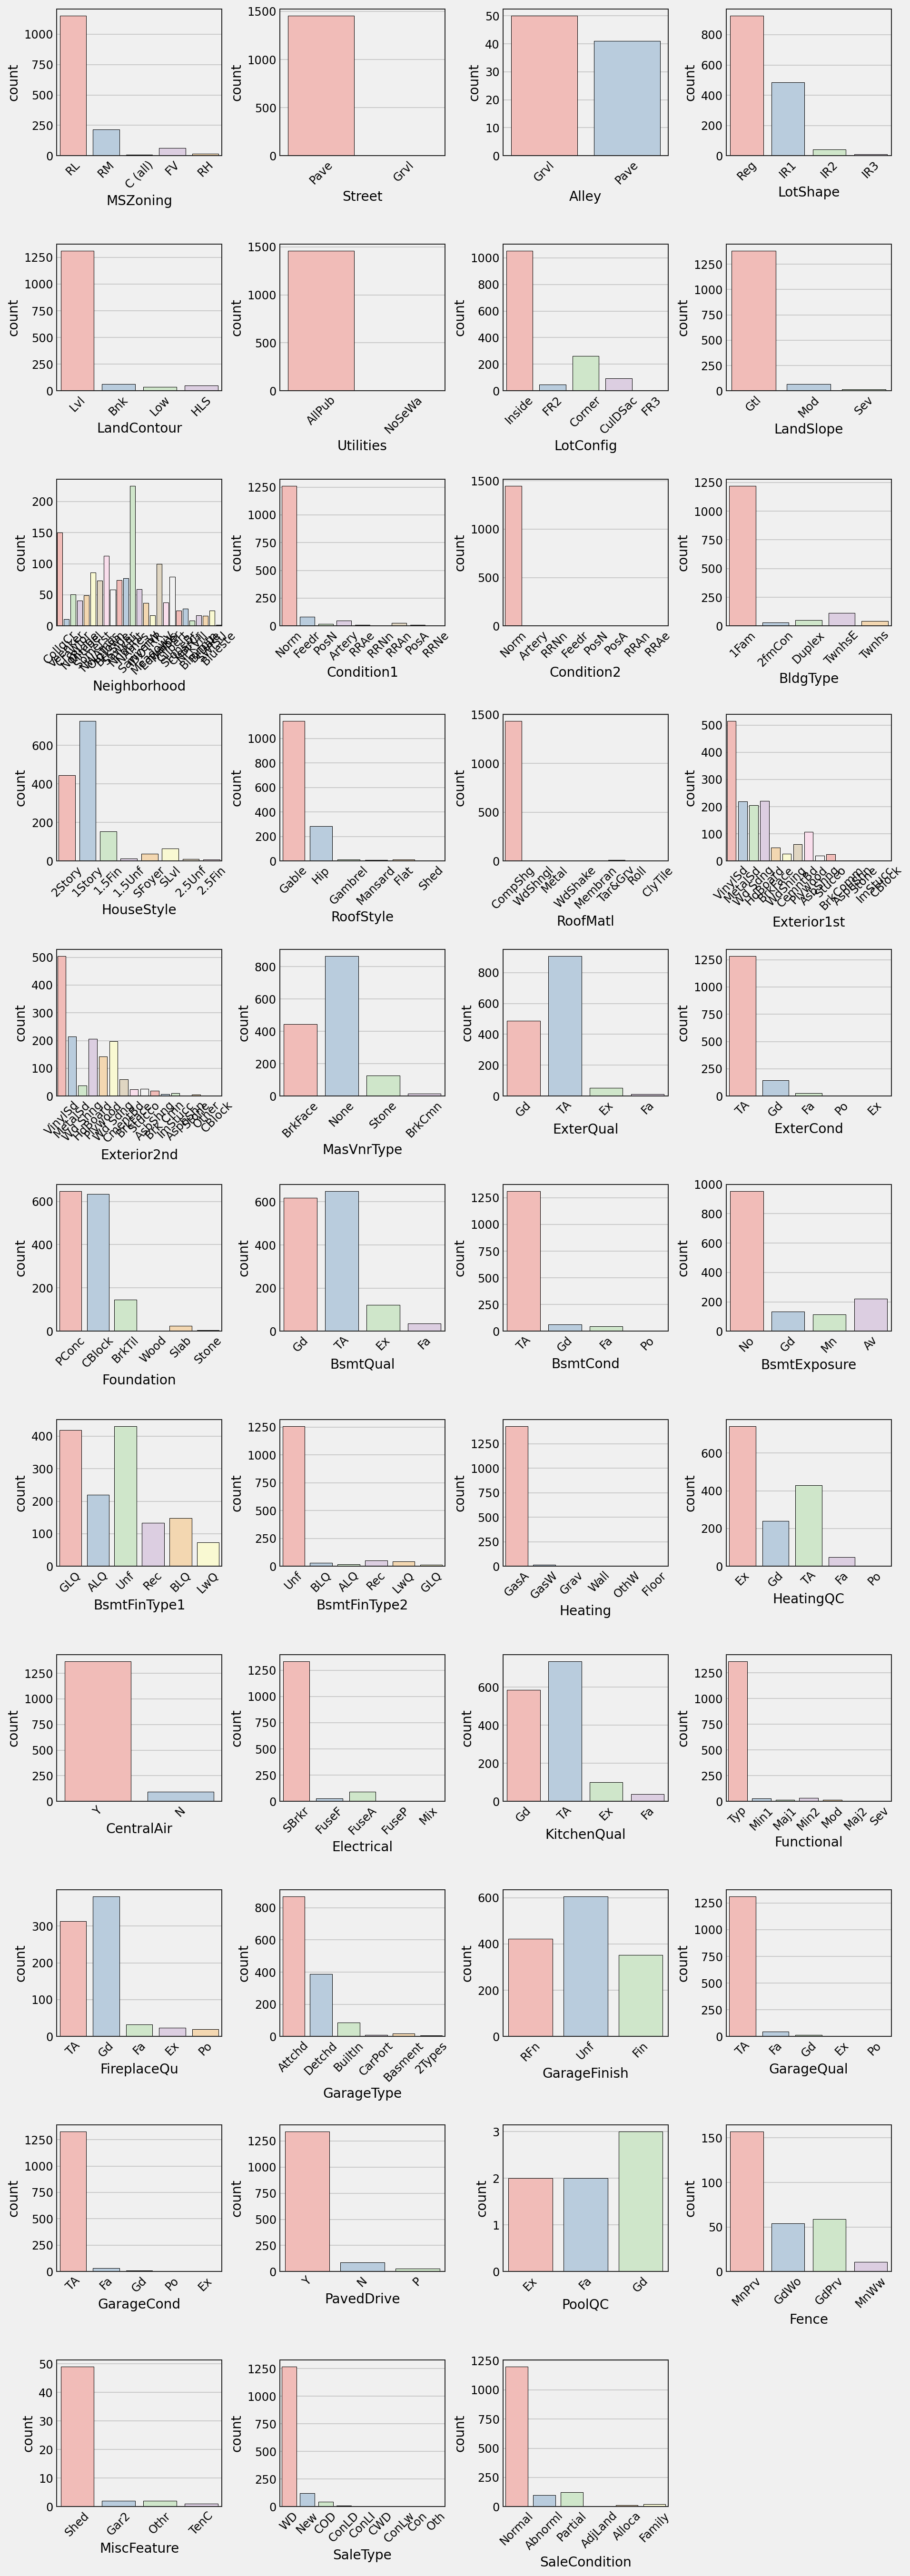

In [14]:
fig = plt.figure(figsize=(14, 45), facecolor='#f0f0f0')

for index, column in enumerate(cat_atts):

    plt.subplot(11, 4, index + 1)
    
    sns.countplot(x=column, data=train_df, edgecolor=edgecolor, palette='Pastel1')
    plt.xticks(rotation=45)

plt.subplots_adjust(hspace = 0.6, wspace = 0.35);

- Most categorical features are nominal,
- Again, some have mostly one value/category (see 'Street' as an example).

In [15]:
thd = 0.95
columns_low_var = low_variance(cat_atts, thd)

print('Categorical attributes with mostly the same value (> {}%): '.format(thd))
print(*columns_low_var, sep=',\n')

Categorical attributes with mostly the same value (> 0.95%): 
Street,
Utilities,
Condition2,
RoofMatl,
Heating,
GarageQual,
GarageCond


<br>

## Bivariate Analysis

So far, we have examined each feature individually. Bivariate analysis refers to the analysis of bivariate data to determine if a relationship between two features exists.

By using the `corr()` method, we can calculate how much each feature (linearly-)correlates with 'SalePrice':

In [16]:
correlations = numeric_atts.select_dtypes(exclude=['object']).corr()
correlations = correlations[['SalePrice']].sort_values(by=['SalePrice'],
                                                       ascending=False)
correlations.style.background_gradient(cmap='Blues', axis=0)

,SalePrice
SalePrice,1.00
OverallQual,0.79
GrLivArea,0.71
GarageCars,0.64
GarageArea,0.62
TotalBsmtSF,0.61
1stFlrSF,0.61
FullBath,0.56
TotRmsAbvGrd,0.53
YearBuilt,0.52


Our target variable is highly (positively) correlated with:

- Overall material and finish quality ('OverallQual'),
- Above grade (ground) living area square feet ('GrLivArea'),
- Size of garage in car capacity ('GarageCars'),
- Size of garage in square feet ('GarageArea'), and
- First Floor square feet ('1stFlrSF')

It is not a surprise that people pay more for bigger houses and houses with garage space. Note that 'GarageCars' and 'GarageArea' convey similar information. Therefore, we need to check for **multicollinearity**.

<br>

'SalePrice' is not affected (-0.10 < correlation < 0.10) from:

- 'MoSold': Month Sold,
- 'YrSold': Year Sold, 
- 'MSSubClass': The building class,
- . . .

<br>

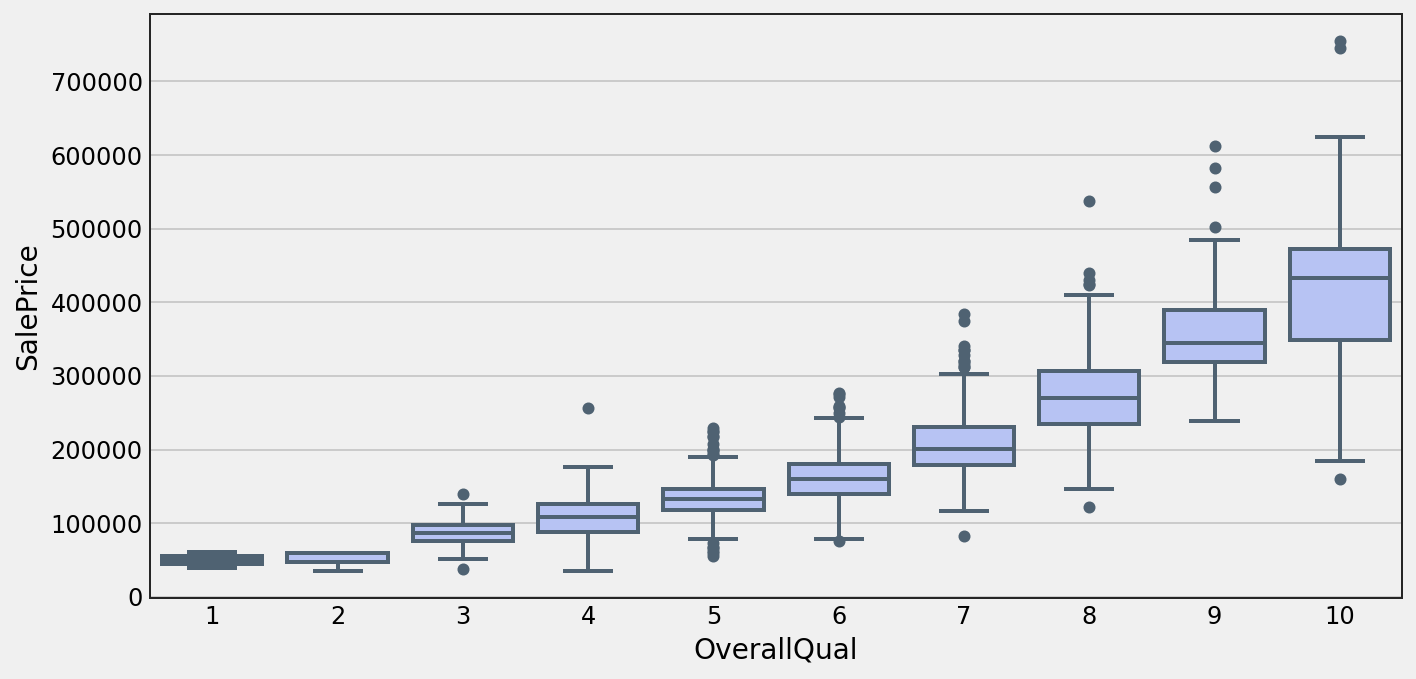

In [17]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor='#f0f0f0')
color = '#4F6272'

sns.boxplot(x='OverallQual',
            y='SalePrice',
            data=train_df,
            linewidth=2,
            medianprops={'color':color},
            capprops={'color':color},
            whiskerprops={'color':color},
            flierprops=dict(marker='o',
                  markerfacecolor=color,
                  markeredgecolor=color),
            boxprops = dict(color='#B7C3F3', edgecolor=color),
            ax=ax);


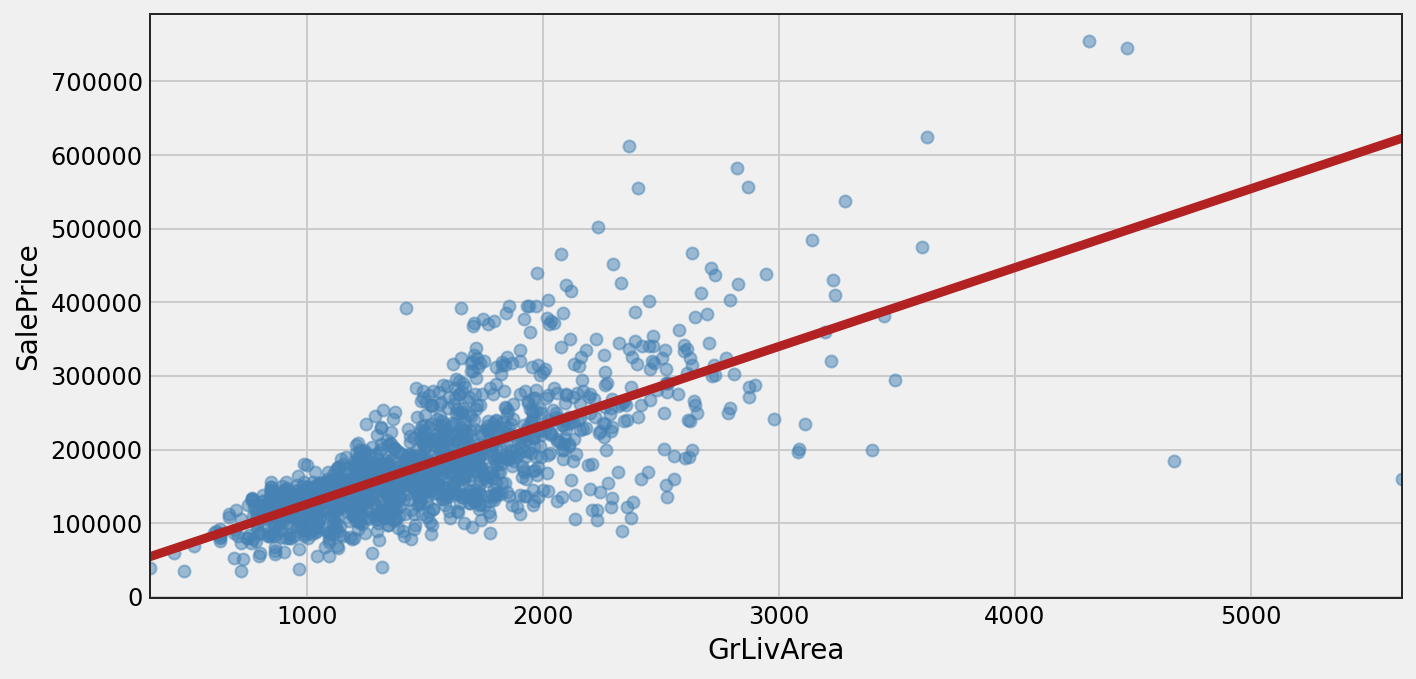

In [18]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor='#f0f0f0')

sns.regplot(x='GrLivArea',
            y='SalePrice',
            data=train_df,
            ci=None,
            color='steelblue',
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'firebrick'},
            ax=ax);

Additionally, we can visually extract information about correlations by using Seaborn's `regplot()`. This method could also help us detect any non-linear relationships.

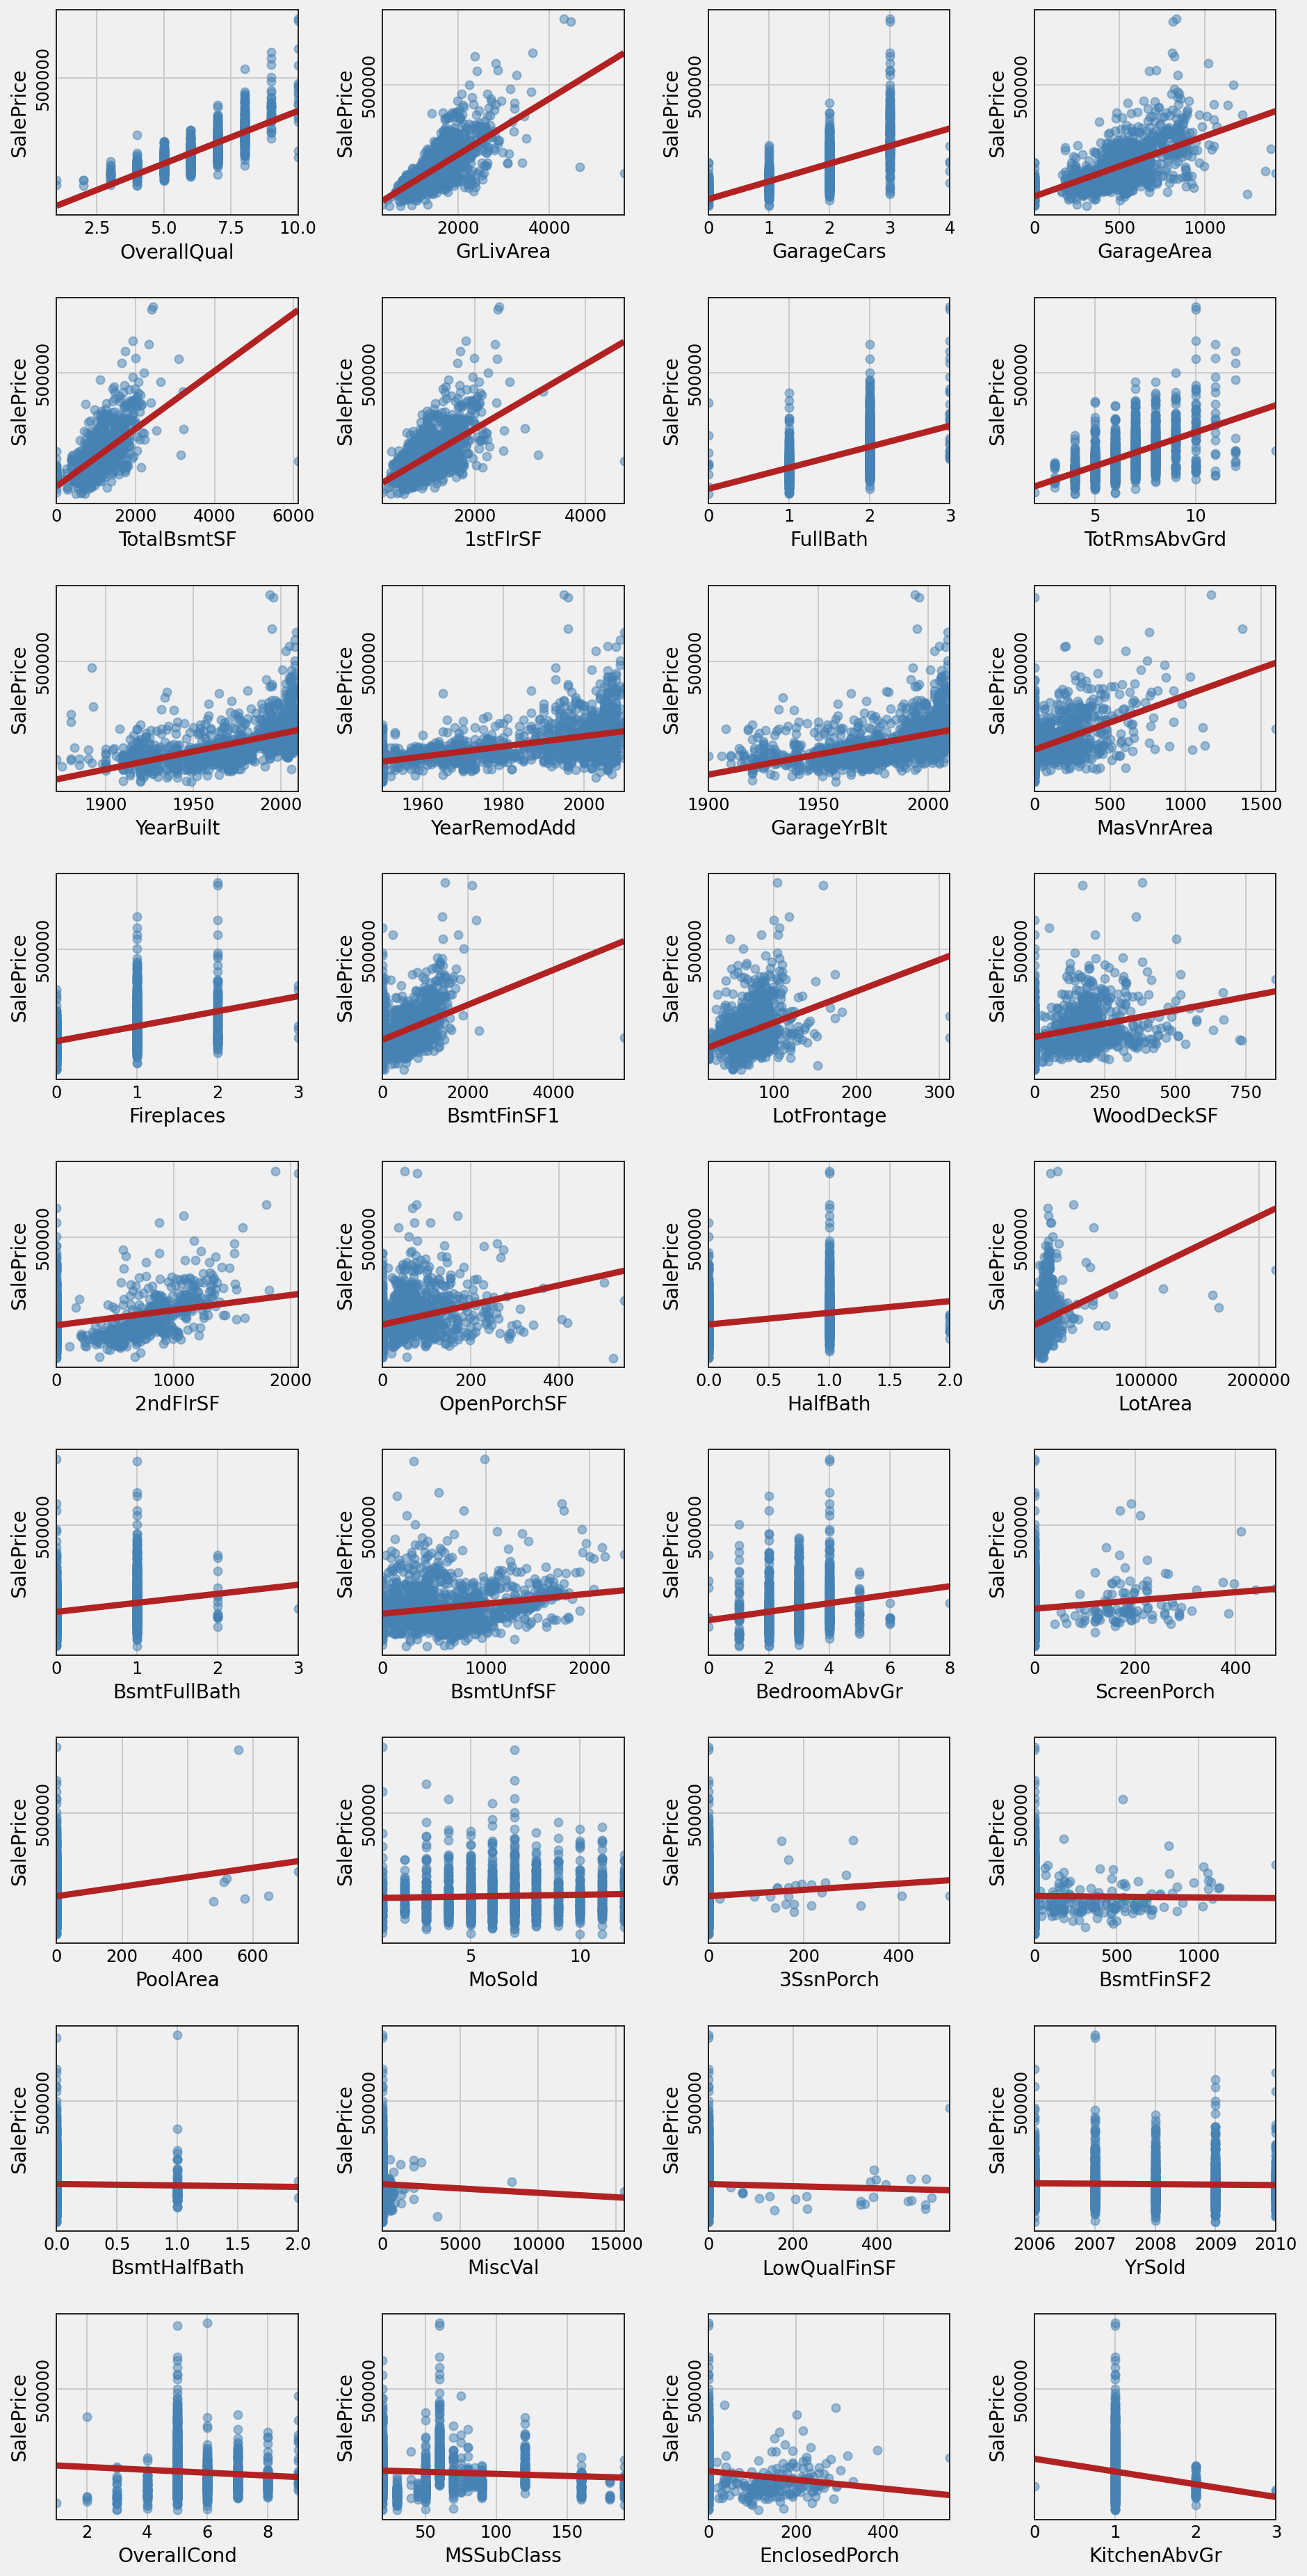

In [19]:
fig = plt.figure(figsize=(14, 70), facecolor='#f0f0f0')

for index, column in enumerate(correlations.index[1:]):

    plt.subplot(20, 4, index + 1)
    sns.regplot(x=column,
                y='SalePrice',
                data=train_df,
                ci=None,
                color='steelblue',
                scatter_kws={'alpha': 0.5},
                line_kws={'color': 'firebrick'})

    ax = plt.gca()
    ax.set_yticks([500000])
    ax.set_yticklabels(labels = [500000], rotation=90, va="center")
    
# fig.tight_layout()
plt.subplots_adjust(hspace = 0.4, wspace = 0.35);

<br>

Finally, we can use plot a **correlation matrix** which can help us identify **multicollinear features**.

We read in [Investopedia](https://www.investopedia.com/terms/m/multicollinearity.asp) that '*multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model*'.

The same source explains why we should avoid it: '*Multicollinearity can lead to skewed or misleading results when a researcher or analyst attempts to determine how well each independent variable can be used most effectively to predict or understand the dependent variable in a statistical model.*'

In the following figure, we use a mask so that only correlations > 0.75 are highlighted:

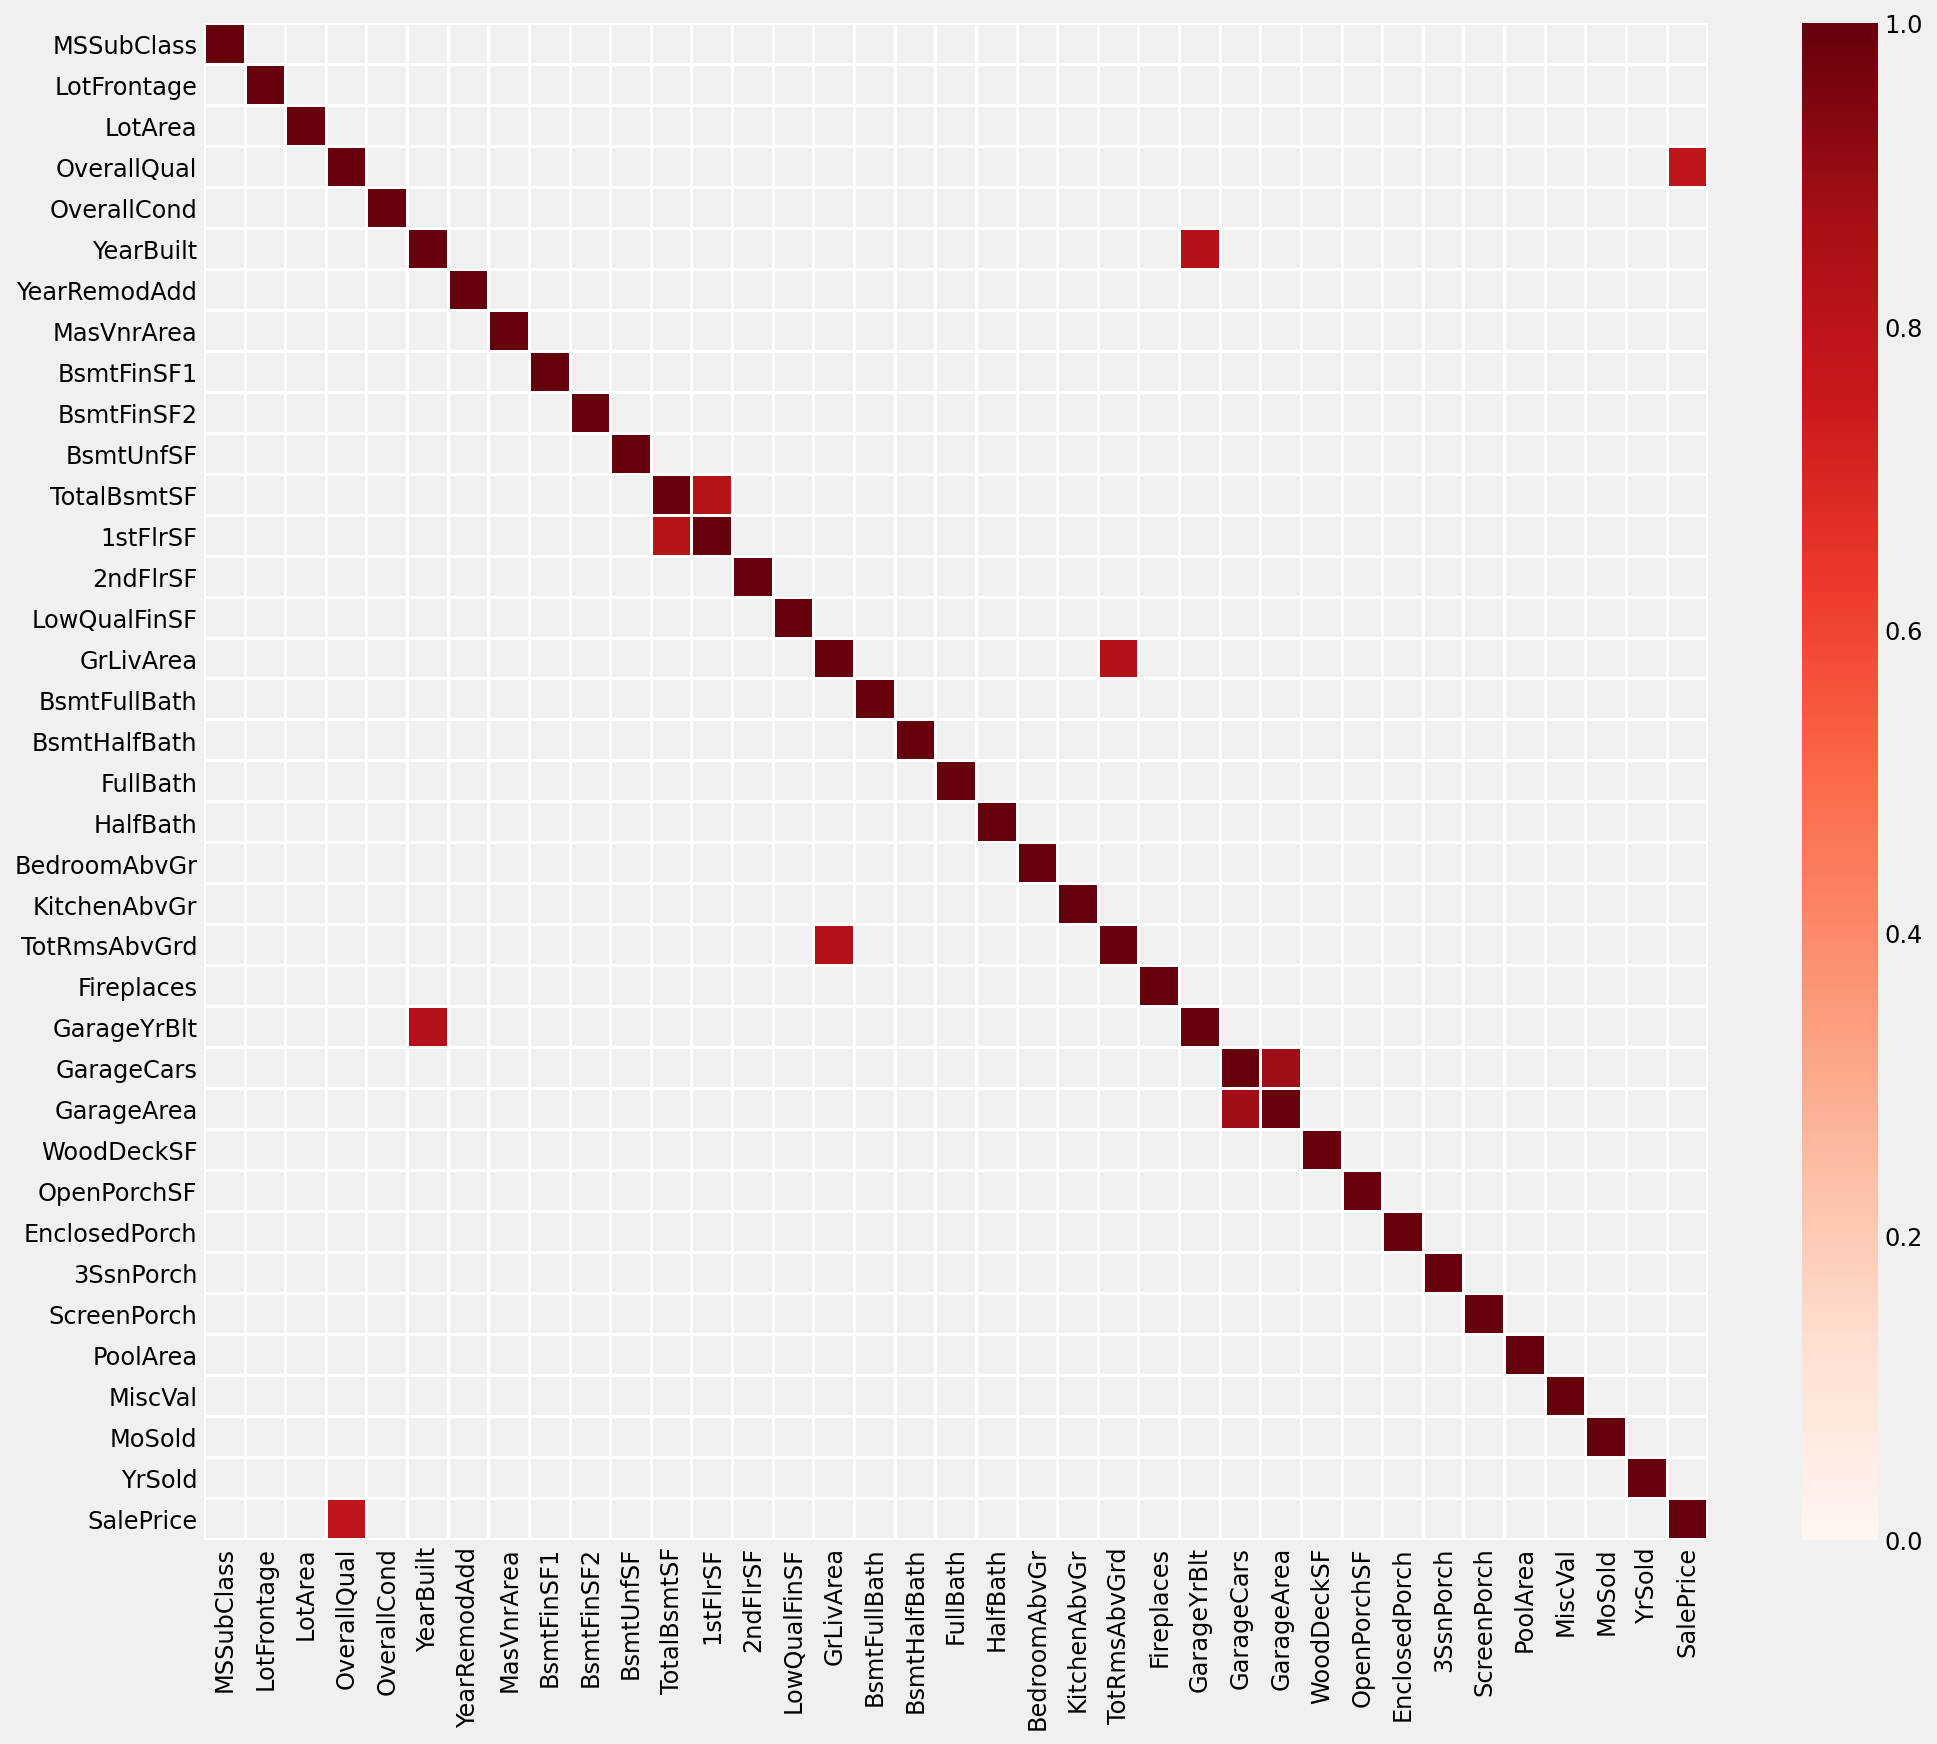

In [20]:
fig, ax = plt.subplots(figsize=(15, 13), facecolor='#f0f0f0')

corr_matrix = numeric_atts.corr()
sns.heatmap(corr_matrix,
            mask=np.abs(corr_matrix) < 0.75,
            linewidth=1,
            cmap='Reds',
            vmin=0,
            ax=ax);

There are **four sets** of highly correlated features:

- 'GarageArea' and 'GarageCars', just as we expected,
- 'GarageYrBlt' and 'YearBuilt',
- 'TotRmsAbvGrd' and 'GrLivArea', and
- '1stFlrSF' and 'TotalBsmtSF'.

We should remove one feature from each set during the preprocessing state.

<br>

# Conclusions

Our kernel came to an end! We can conclude that:

- Our training set has a total of **80 attributes + the target variable** ('SalePrice'),
- Many attributes contain **missing values**. A closer look reveals that a NaN value may not always indicate a missing value. For **imputation**, we should consult the description of each attribute to select the best strategy,
- Numeric attributes have **different scales**,
- Many attributes (both numeric and categorical) display **low variance**,
- Many attributes contain **outliers**,
- Bivariate analysis reveals which attributes display a **higher correlation** with 'SalePrice'. It also reveals four sets of highly **multicollinear attributes**.

<br>

A separate kernel on processing and Machine Learning models will be out soon!

---